## 제출 산출물

1. **데이터 기술 보고서**
    1. 주제
        - 주제: 암호화폐 시장의 가격 변동성 분석 및 세력 매집 신호 탐지
        - 주제 선택 이유: 암호화폐 시장은 내재 가치가 불명확하고, 주가와 같은 명확한 가치 판단 지표가 부재하여, 시장 가격이 작전 세력에 의해 크게 영향을 받는다고 알려져 있습니다. 이 프로젝트는 거래소 데이터를 분석하여 세력의 매집 신호를 사전에 파악함으로써, 이러한 시장 동향에 대응할 수 있는 기반을 마련하고자 합니다.
        - 이용 계획: 수집 및 분석한 데이터를 기반으로 암호화폐 시장에서 세력의 움직임을 예측하고, 이를 투자 전략에 활용하거나, 관련 정보를 제공하는 서비스를 개발할 수 있습니다.
    
    2. 프로젝트 조원별 담당 업무
        - 업무의 구분 없이 전원 함께 작업함
        - 업무내용
        - 1. 빗썸 API를 사용하여 암호화폐 목록 및 기본 데이터 수집
        - 2. Selenium을 활용한 빗썸 거래소 정보 크롤링 및 데이터 추출
        - 3. Pandas를 사용한 데이터 정제 데이터프레임 구성
        - 4. MySQL 데이터베이스 관리 및 데이터 전송, 수정 작업
        - 5. 데이터 분석 및 상위 종목 추출 로직 도출, 최종 CSV 파일 생성
    3. 후기
        - 개인 별 프로젝트 진행 후기를 따로 문서로 작성하세요.
        
2. **데이터 탐색 보고서**

    1. 크롤링한 사이트에 대한 분석 정보
        - 사이트: bithumb
            - 분석 내용: 빗썸 거래소는 한국의 대표적인 암호화폐 거래소 중 하나로, 다양한 암호화폐의 거래 정보 및 유동성 데이터를 제공합니다. 거래소 내부 데이터를 활용하기 위해 API 및 웹 페이지의 구조를 분석하여 필요한 정보를 추출했습니다.
            - 크롤링 페이지 캡쳐: 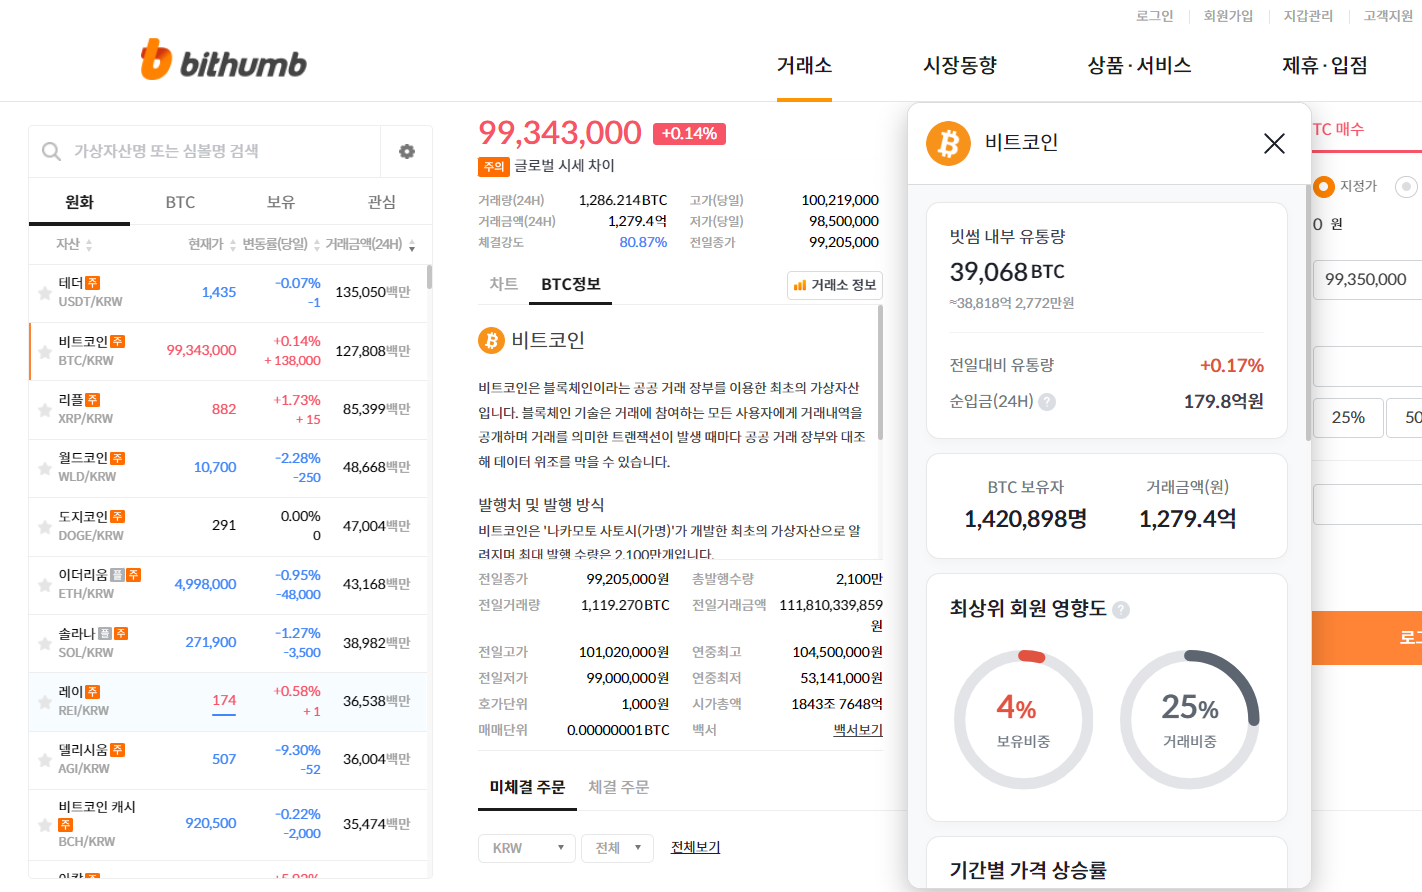
            - 2023년 12월부터 투자자 보호 목적으로 거래소 내부 데이터를 실시간으로 제공하고 있습니다. 상당히 유의미한 데이터이나, 과거 기록은 제공되지 않고, 실시간으로만 제공되는 상황에서 약 300개의 암호화폐를 개인이 분석하기에는 현실적으로 불가능 합니다. 이 프로젝트의 목적은 데이터를 크롤링과 SQL을 사용해서 최종적으로는 상승할 여력이 높은 상위 종목들을 추출하는 것입니다.
        - 어려웠던 점 및 해결방법
            - 홈페이지 온전히 열리기 전에 함수가 실행되어 Ticker정보 모달, 거래소 정보 모달 클릭이 안됨 -> wait() 함수를 이용하여 해결.
            - 동기적으로 구현한 결과 웹페이지 하나씩 열고 닫는 것 때문에 프로젝트 진행이 오래걸림 -> 비동기적으로 변경.
            - 크롤링할 때 실시간으로 값이 변하여 실행 시 에러가 남 -> selenium 모듈 사용.
            - 크롤링 시 여러 브라우저가 뜨는 것이 프로젝트 진행 시 불편하기 때문에 headless를 사용하는 것을 시도 -> 스크린샷으로 확인한 결과, 브라우저가 흰색으로만 떠 데이터를 못 읽음. 프로젝트 진행 과정에 적합하지 않다 판단하여 headless를 사용하지 않는 것으로 판단.
            - 최상위 회원 보유 비중의 숫자의 10의 자리 수와 1의 자리 수의 select 주소가 달라서 정확한 데이터 크롤링이 안됨 -> 각각의 select 주소를 가져와 get_text_from_selector() 에 각각 대입하여 합한 후, 문자열을 숫자 데이터로 변환하여 해결.
            - 문자열로 데이터를 가져오기 때문에 연산이 필요한 정보를 계산할 수 없음 -> 문자열을 숫자열로 변환하고 기호를 없애주는  convert_to_number() 함수를 만들어 해결.
            - 연산이 필요한 정보를 계산할 때 제수가 0인 항목이 있어 ZeroDivsionError가 발생 -> try, except 구문을 이용하여 ZeroDivisionError가 발생하면 0으로 return 해주는 division_if_error() 함수를 구현하여 해결.
            - 본래 프로젝트 목표는 크롤링해서 생성한 bithumb_table을 원천 데이터로 사용하여 bithumb_table2를 생성하는 것. bithumb_table2은 서로 다른 날짜의 bithumb_table의 값을 사용해서 변동 값을 저장하는 테이블. 이를 위해서 일별 타임 시리즈로 데이터 세트가 필요한데 2일 치의 데이터밖에 없으므로 random 함수를 사용해서 임의로 table을 생성하여 진행하고 함. 하지만 이는 단순히 랜덤한 값을 기존의 값에 더해주는 것이기 때문에 프로젝트 취지와 맞지 않다고 판단하여 하지 않는 것으로 결정.
    2. 프로젝트 구현 방식
        - 1. 정적 페이지 데이터 수집
            - 사용 기술: requests와 BeautifulSoup
            - 설명: 이 단계에서는 requests 라이브러리를 사용하여 웹 페이지의 HTML을 가져옵니다. 그런 다음 BeautifulSoup을 이용하여 HTML 문서를 파싱하고 필요한 데이터를 추출합니다. 이 방법은 주로 정적인 웹 페이지에서 데이터를 수집하는 데 적합합니다. 
        - 2. 동적 데이터 크롤링
            - 사용 기술: Selenium
            - 설명: 동적으로 로드되는 웹 페이지의 데이터를 수집하기 위해 Selenium을 사용합니다. Selenium은 실제 웹 브라우저를 자동화하여 웹 페이지 상의 동작을 모방하고, JavaScript로 로드되는 데이터를 포함하여 페이지의 전체 내용을 가져올 수 있습니다. 저희는 이 단계를 비동기 방식으로 구현하였습니다.
        - 3. 데이터 정리 및 분석
            - 사용 기술: Pandas
            - 설명: 수집된 데이터는 Pandas 라이브러리를 사용하여 정리하고 분석합니다. Pandas는 데이터를 효율적으로 처리하고 분석하기 위한 다양한 기능을 제공하는 Python 라이브러리입니다. 예를 들어, 데이터를 필터링하거나, 새로운 데이터 컬럼을 생성하거나, 통계적 분석을 수행할 수 있습니다.
        - 4. 데이터 저장 및 관리
            - 사용 기술: MySQL
            - 설명: 크롤링하여 분석한 데이터는 MySQL 데이터베이스에 저장합니다. MySQL은 관계형 데이터베이스 관리 시스템(RDBMS)으로, 대량의 데이터를 효율적으로 관리할 수 있습니다. 데이터베이스에 데이터를 저장함으로써 데이터의 안정적인 보관, 검색, 업데이트가 가능해집니다.
        - 5. 최종 데이터 분석 결과의 다운로드
            - 설명: 프로젝트의 마지막 단계로, 최종 데이터 분석 결과를 CSV 파일 형태로 다운로드합니다. 이는 Pandas의 to_csv 함수를 사용하여 쉽게 수행할 수 있습니다. CSV 파일 형식은 데이터를 저장하고 공유하기 위한 표준적인 형식 중 하나로, 다양한 데이터 분석 도구나 소프트웨어에서 지원합니다.
3. **데이터 셋**
        - "Ticker": coin_name
        - "Date": datetime.today().strftime("%Y/%m/%d")
        - "시가총액(억)": marketcap
        - "보유비중(%)": top_holding
        - "거래비중(%)": top_volume
        - "보유자수(명)": num_total_holding
        - "내부보유금액(억)": bithumb_supply
        - "24시간 순입금(억)": net_deposit
        - "전일대비유통량증감(%)": bithumb_supply_chagne
        - "24시간 거래금액(억)": volume_amount
        - "체결강도(%)": transaction
        - "가격": price
        - "빗썸유통비율(%)": round(division_if_error(bithumb_supply, marketcap)*100 ,2)
        - "거래금액/내부보유금액(%)": round(division_if_error(volume_amount, bithumb_supply)*100, 2)
        - "순입금/내부보유금액(%)": round(division_if_error(net_deposit, bithumb_supply)*100, 2)
        - "1주일 상승률(%)": one_week
        - "1개월 상승률(%)": one_month
        - "3개월 상승률(%)": three_month